# DECISION TREES
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from acquire import get_titanic_data, get_telco_data
from prepare import prep_titanic, prep_telco, prep_titanic_keep_age
import env

from FUNctions import describe_data

1.) What is your baseline prediction? What is your baseline accuracy? 
- remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [127]:
titanic = get_titanic_data() 
#describe_data(titanic)
titanic = prep_titanic(titanic)
describe_data(titanic)

Using cached csv
The first three rows are: 
----------------------------------------------------------
   survived  pclass  sibsp  parch     fare  alone  Queenstown  Southampton  \
0         0       3      1      0   7.2500      0           0            1   
1         1       1      1      0  71.2833      0           0            0   
2         1       3      0      0   7.9250      1           0            1   

   male  
0     1  
1     0  
2     0  
----------------------------------------------------------
The data frame's shape is: 
-------------------------
(891, 9)
-------------------------
The data types and column names are: 
['Queenstown', 'Southampton', 'alone', 'fare', 'male', 'parch', 'pclass', 'sibsp', 'survived']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null   

In [128]:
# Since my data is already prepared due to a previous exercise, I can immediately split. 
train, test = train_test_split(titanic, test_size=.2, random_state=123, stratify=titanic.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

train.shape, validate.shape, test.shape
# columns line up, good to go. 

((498, 9), (214, 9), (179, 9))

In [129]:
X_train, y_train = train.drop(columns='survived'), train.survived
X_validate, y_validate = validate.drop(columns='survived'), validate.survived
X_test, y_test = test.drop(columns='survived'), test.survived

In [130]:
print(f'{titanic.survived.value_counts()}')
print('Based on this, the baseline is fatalities. Non-survivors.')
train['baseline'] = 0

0    549
1    342
Name: survived, dtype: int64
Based on this, the baseline is fatalities. Non-survivors.


In [131]:
accuracy_score(train.survived, train.baseline)

0.6164658634538153

2.) Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [132]:
model1 = DecisionTreeClassifier(max_depth=1)
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 79.92%
validate score: 76.17%


In [133]:
train['model1'] = model1.predict(X_train)
train.head()

,survived,pclass,sibsp,parch,fare,alone,Queenstown,Southampton,male,baseline,model1
583,0,1,0,0,40.1250,1,0,0,1,0,0
165,1,3,0,2,20.5250,0,0,1,1,0,0
50,0,3,4,1,39.6875,0,0,1,1,0,0
259,1,2,0,1,26.0000,0,0,1,0,0,1
306,1,1,0,0,110.8833,1,0,0,0,0,1


In [134]:
y_pred = model1.predict(X_train)

3.) Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [135]:
#using model score
model1.score(X_validate,y_validate)

0.7616822429906542

In [136]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,265,42
1,58,133


In [137]:
#classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.76      0.70      0.73       191

    accuracy                           0.80       498
   macro avg       0.79      0.78      0.78       498
weighted avg       0.80      0.80      0.80       498



In [138]:
report = classification_report(y_train, y_pred, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.820433,0.760000,0.799197,0.790217,0.797255
recall,0.863192,0.696335,0.799197,0.779764,0.799197
f1-score,0.841270,0.726776,0.799197,0.784023,0.797358
support,307.000000,191.000000,0.799197,498.000000,498.000000


4.) Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [139]:
# COnfusion Matrix will give me the values needed for TP, FP, TN, FN rates

In [140]:
#accuracy
acc = sklearn.metrics.accuracy_score(y_train, y_pred)
print(f' The accuracy is: {acc:.2%}')

#Confusion Matrix for TP FP TN FN
cm = confusion_matrix(y_train, y_pred)
print(f' Confusion Matrix: \n {cm} \n ')

titanic_cm = confusion_matrix(y_train, y_pred)
titanic_cm

tpr = titanic_cm[1][1] / titanic_cm[1].sum()
fpr = titanic_cm[0][1] / titanic_cm[0].sum()
tnr = titanic_cm[0][0] / titanic_cm[0].sum()
fnr = titanic_cm[1][0] / titanic_cm[1].sum()

tn, fp, fn, tp = titanic_cm.ravel()
print(f'Number of true negatives  (tn) = {tn} \n The True Negative Rate (tnr) is: {tnr:.3} \n')
print(f'Number of true positives  (tp) = {tp} \n The True Positive Rate (tpr) is:  {tpr:.3} \n')
print(f'Number of false negatives (fn) = {fn} \n The False Negative Rate (tpr) is: {fnr:.3} \n')
print(f'Number of false positives (fp) = {fp} \n The False Positive Rate (tpr) is: {fpr:.3} \n')

print(f"""
What the confusion matrix tells us now, in more detail, is that we got {tp}
of the people who did not survive right, and {tn} of the people who did survive right.
But also that we killed {fp} of the passengers in our model,
and brought {fn} of them back to life through Necromancy!""")
#precision
pre = sklearn.metrics.precision_score(y_train,y_pred)
print(f' The precision is: {pre:.2%}')

#recall
rec = sklearn.metrics.recall_score(y_train,y_pred)
print(f' The recall rate is: {rec:.2%}')

#f1-score
f1 = sklearn.metrics.f1_score(y_train,y_pred)
print(f' The F1 score is: {f1:.2%}')

#support

#FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
#FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
#TP = np.diag(confusion_matrix)
#TN = confusion_matrix.sum() - (FP + FN + TP)
#
#print(FP, FN, TP, TN)

 The accuracy is: 79.92%
 Confusion Matrix: 
 [[265  42]
 [ 58 133]] 
 
Number of true negatives  (tn) = 265 
 The True Negative Rate (tnr) is: 0.863 

Number of true positives  (tp) = 133 
 The True Positive Rate (tpr) is:  0.696 

Number of false negatives (fn) = 58 
 The False Negative Rate (tpr) is: 0.304 

Number of false positives (fp) = 42 
 The False Positive Rate (tpr) is: 0.137 


What the confusion matrix tells us now, in more detail, is that we got 133
of the people who did not survive right, and 265 of the people who did survive right.
But also that we killed 42 of the passengers in our model,
and brought 58 of them back to life through Necromancy!
 The precision is: 76.00%
 The recall rate is: 69.63%
 The F1 score is: 72.68%


In [141]:
train_results = pd.DataFrame()
train_results['actual'] = y_train
train_results['predicted'] = y_pred

In [142]:
n=len(train)
tp_rate = len(train_results[(train_results.predicted == 1) & (train_results.actual == 1)]) / (train_results.actual == 1).sum()
fp_rate = len(train_results[(train_results.predicted == 1) & (train_results.actual != 1)]) / (train_results.actual == 0).sum()
tn_rate = len(train_results[(train_results.predicted != 1) & (train_results.actual != 1)]) / (train_results.actual == 0).sum()
fn_rate = len(train_results[(train_results.predicted != 1) & (train_results.actual == 1)]) / (train_results.actual == 1).sum()

print(f'True Postive Rate:\t{tp_rate:.2f}')
print(f'False Positive Rate:\t{fp_rate:.2f}')
print(f'True Negative Rate:\t{tn_rate:.2f}')
print(f'False Negative Rate:\t{fn_rate:.2f}')

True Postive Rate:	0.70
False Positive Rate:	0.14
True Negative Rate:	0.86
False Negative Rate:	0.30


In [143]:
n

498

5.) Run through steps 2-4 using a different _depth value.

0.7429906542056075


[Text(154.35770547945205, 210.645, 'X[7] <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(68.22123287671234, 197.055, 'X[0] <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(33.0213698630137, 183.465, 'X[3] <= 28.856\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(25.68328767123288, 169.875, 'X[3] <= 28.231\ngini = 0.133\nsamples = 42\nvalue = [3, 39]'),
 Text(22.01424657534247, 156.285, 'X[3] <= 22.0\ngini = 0.093\nsamples = 41\nvalue = [2, 39]'),
 Text(18.345205479452055, 142.695, 'X[3] <= 20.25\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(11.007123287671234, 129.10500000000002, 'X[3] <= 13.25\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(7.338082191780822, 115.515, 'X[3] <= 12.825\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(3.669041095890411, 101.925, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(11.007123287671234, 101.925, 'X[4] <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(7.338082191780822, 88.3350000

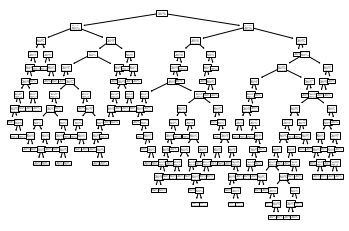

In [144]:
model2 = DecisionTreeClassifier(max_depth = 30)
model2.fit(X_train, y_train)
print(model2.score(X_validate,y_validate))
plot_tree(model2)

In [145]:
print(f'training score: {model2.score(X_train, y_train):.2%}')
print(f'validate score: {model2.score(X_validate, y_validate):.2%}')

training score: 94.58%
validate score: 74.30%


In [146]:
train['model2'] = model2.predict(X_train)
train.head()
y_pred2 = model2.predict(X_train)
print(f'{pd.crosstab(y_train, y_pred2)}')

col_0       0    1
survived          
0         305    2
1          25  166


In [147]:
print(classification_report(y_train, y_pred2))

#accuracy
acc2 = sklearn.metrics.accuracy_score(y_train, y_pred2)
print(f' The accuracy is: {acc2:.2%}')

#Confusion Matrix for TP FP TN FN
cm2 = confusion_matrix(y_train, y_pred2)
print(f' Confusion Matrix: \n {cm2} \n ')

titanic_cm2 = confusion_matrix(y_train, y_pred2)
titanic_cm2

tn2, fp2, fn2, tp2 = titanic_cm2.ravel()
print("Number of true negatives  (tn) = ",tn2)
print("Number of true positives  (tp) = ",tp2)
print("Number of false negatives (fn) = ",fn2)
print("Number of false positives (fp) = ",fp2)

print(f"""
What the confusion matrix tells us now, in more detail, is that we got {tn}
of the people who did not survive right, and {tp} of the people who did survive right.
But also that we killed {fn} of the passengers in our model,
and brought {fp} of them back to life through Necromancy!""")
#precision
pre2 = sklearn.metrics.precision_score(y_train,y_pred2)
print(f' The precision is: {pre2:.2%}')

#recall
rec2 = sklearn.metrics.recall_score(y_train,y_pred2)
print(f' The recall rate is: {rec2:.2%}')

#f1-score
f12 = sklearn.metrics.f1_score(y_train,y_pred2)
print(f' The F1 score is: {f12:.2%}')

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       307
           1       0.99      0.87      0.92       191

    accuracy                           0.95       498
   macro avg       0.96      0.93      0.94       498
weighted avg       0.95      0.95      0.95       498

 The accuracy is: 94.58%
 Confusion Matrix: 
 [[305   2]
 [ 25 166]] 
 
Number of true negatives  (tn) =  305
Number of true positives  (tp) =  166
Number of false negatives (fn) =  25
Number of false positives (fp) =  2

What the confusion matrix tells us now, in more detail, is that we got 265
of the people who did not survive right, and 133 of the people who did survive right.
But also that we killed 58 of the passengers in our model,
and brought 42 of them back to life through Necromancy!
 The precision is: 98.81%
 The recall rate is: 86.91%
 The F1 score is: 92.48%


6.) Which model performs better on your in-sample data?

In [148]:
print(f' The second model with a max_depth of 30 has an accuracy of: {acc2:.2%}, \n which is superior to the first model at {acc:.2%}')

 The second model with a max_depth of 30 has an accuracy of: 94.58%, 
 which is superior to the first model at 79.92%


7.) Which model performs best on your out-of-sample data, the validate set?

In [149]:
# get predictions for our validation sets
y_val_pred_1 = model1.predict(validate.drop(columns='survived'))
y_val_pred_2 = model2.predict(validate.drop(columns='survived'))
                                          
# get validation accuracy
accuracy_v_1 = model1.score(validate.drop(columns='survived'), validate.survived)
accuracy_v_2 = model2.score(validate.drop(columns='survived'), validate.survived)
                                          
print(f'{accuracy_v_1}')
print(f'{accuracy_v_2}')

0.7616822429906542
0.7429906542056075


In [150]:
out_of_sample_accuracy = model1.score(X_validate, y_validate)
print(out_of_sample_accuracy)
out_of_sample_accuracy2 = model2.score(X_validate, y_validate)
print(out_of_sample_accuracy2)

# I have a feeling I did this incorrectly, because they are so close in accuracy.

0.7616822429906542
0.7429906542056075


# Same Exercises, this time on TELCO
Telco was annoyingly interfering with the following model exercises, so I am hashing it out. 

In [161]:
# def train_validate_test_split(df, target, seed=123):
#     '''
#     This function takes in a dataframe, the name of the target variable
#     (for stratification purposes), and an integer for a setting a seed
#     and splits the data into train, validate and test. 
#     Test is 20% of the original dataset, validate is .30*.80= 24% of the 
#     original dataset, and train is .70*.80= 56% of the original dataset. 
#     The function returns, in this order, train, validate and test dataframes. 
#     The target is what I intend to stratify. 
#     '''
#     train_validate, test = train_test_split(df, test_size=0.2, 
#                                             random_state=seed, 
#                                             stratify=df[target])
#     train, validate = train_test_split(train_validate, test_size=0.3, 
#                                        random_state=seed,
#                                        stratify=train_validate[target])
#     return train, validate, test
# 

1.) What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [162]:
# telco = df = get_telco_data()
# telco = df = prep_telco(telco)
# telco.head()

In [163]:
# train_validate_test_split(telco, 'churn')
# train, validate, test = train_validate_test_split(df, target='churn', seed=123)
# 
# X_train = train.drop(columns=['churn'])
# y_train = train.churn
# 
# X_validate = validate.drop(columns=['churn'])
# y_validate = validate.churn
# 
# X_test = test.drop(columns=['churn'])
# y_test = test.churn

In [164]:
# train.churn.value_counts() 
# as expected, those who did not churn outnumber those who did. 

In [165]:
# baseline = y_train.mode()
# print(baseline)
# 
# # Produce a boolean array with True representing a match between the baseline prediction and reality
# matches_baseline_prediction = (y_train == 0)
# 
# baseline_accuracy = matches_baseline_prediction.mean()
# print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

2.) Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [166]:
# # Make the model
# tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)
# 
# # Fit the model (on train and only train)
# tree1 = tree1.fit(X_train, y_train)
# 
# # Use the model
# # We'll evaluate the model's performance on train, first
# y_predictions = tree1.predict(X_train)
# 
# print(f'training score: {tree1.score(X_train, y_train):.2%}')
# print(f'validate score: {tree1.score(X_validate, y_validate):.2%}')
# 
# y_pred = tree1.predict(X_train)

3.) Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [167]:
# # model score
# print(f' The Model score is: {tree1.score(X_validate, y_validate)}')
# 
# # One approach to confusion matrix
# print(f' Confusion Matrix: \n {pd.DataFrame(confusion_matrix(y_train, y_predictions))}')
# print('----------------------------')
# report = classification_report(y_train, y_predictions, output_dict=True)
# print("Tree with max depth of 3")
# pd.DataFrame(report)

4.) Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [168]:
# acc = sklearn.metrics.accuracy_score(y_train, y_predictions)
# print(f' The accuracy is: {acc:.2%}')
# 
# #Confusion Matrix for TP FP TN FN
# cm = confusion_matrix(y_train, y_predictions)
# print(f' Confusion Matrix: \n {cm} \n ')
# 
# telco_cm = confusion_matrix(y_train, y_predictions)
# telco_cm
# 
# tpr = telco_cm[1][1] / telco_cm[1].sum()
# fpr = telco_cm[0][1] / telco_cm[0].sum()
# tnr = telco_cm[0][0] / telco_cm[0].sum()
# fnr = telco_cm[1][0] / telco_cm[1].sum()
# 
# tn, fp, fn, tp = telco_cm.ravel()
# print(f'Number of true negatives  (tn) = {tn} \n The True Negative Rate (tnr) is: {tnr:.3} \n')
# print(f'Number of true positives  (tp) = {tp} \n The True Positive Rate (tpr) is:  {tpr:.3} \n')
# print(f'Number of false negatives (fn) = {fn} \n The False Negative Rate (tpr) is: {fnr:.3} \n')
# print(f'Number of false positives (fp) = {fp} \n The False Positive Rate (tpr) is: {fpr:.3} \n')
# 
# 
# print(f"""
# What the confusion matrix tells us now, in more detail, is that we got {tn}
# of the people who churned right, and {tp} of the people who did not churn right.
# But also we incorrectly churned {fn} customers in our model,
# and mismarked {fp} of them as churners!""")
# 
# #precision
# pre = sklearn.metrics.precision_score(y_train,y_predictions)
# print(f' The precision is: {pre:.2%}')
# 
# #recall
# rec = sklearn.metrics.recall_score(y_train,y_predictions)
# print(f' The recall rate is: {rec:.2%}')
# 
# #f1-score
# f1 = sklearn.metrics.f1_score(y_train,y_predictions)
# print(f' The F1 score is: {f1:.2%}')

5.) Run through steps 2-4 using a different max_depth value.

In [169]:
# # Make the model
# tree2 = DecisionTreeClassifier(max_depth=15, random_state=123)
# 
# # Fit the model (on train and only train)
# tree2 = tree2.fit(X_train, y_train)
# 
# # Use the model
# # We'll evaluate the model's performance on train, first
# y_predictions2 = tree2.predict(X_train)
# 
# print(f'training score: {tree2.score(X_train, y_train):.2%}')
# print(f'validate score: {tree2.score(X_validate, y_validate):.2%}')
# 
# y_predictions2 = tree2.predict(X_train)

In [170]:
# # model score
# print(f' The Model score is: {tree2.score(X_validate, y_validate)}')
# 
# # One approach to confusion matrix
# print(f' Confusion Matrix: \n {pd.DataFrame(confusion_matrix(y_train, y_predictions2))}')
# print('----------------------------')
# report = classification_report(y_train, y_predictions2, output_dict=True)
# print("Tree with max depth of 15")
# pd.DataFrame(report)

In [171]:
# acc2 = sklearn.metrics.accuracy_score(y_train, y_predictions2)
# print(f' The accuracy is: {acc2:.2%}')
# 
# #Confusion Matrix for TP FP TN FN
# cm2 = confusion_matrix(y_train, y_predictions2)
# print(f' Confusion Matrix: \n {cm2} \n ')
# 
# telco_cm2 = confusion_matrix(y_train, y_predictions2)
# telco_cm2
# 
# tpr2 = telco_cm2[1][1] / telco_cm2[1].sum()
# fpr2 = telco_cm2[0][1] / telco_cm2[0].sum()
# tnr2 = telco_cm2[0][0] / telco_cm2[0].sum()
# fnr2 = telco_cm2[1][0] / telco_cm2[1].sum()
# 
# tn2, fp2, fn2, tp2 = telco_cm2.ravel()
# print(f'Number of true negatives  (tn) = {tn2} \n The True Negative Rate (tnr) is: {tnr2:.3} \n')
# print(f'Number of true positives  (tp) = {tp2} \n The True Positive Rate (tpr) is:  {tpr2:.3} \n')
# print(f'Number of false negatives (fn) = {fn2} \n The False Negative Rate (tpr) is: {fnr2:.3} \n')
# print(f'Number of false positives (fp) = {fp2} \n The False Positive Rate (tpr) is: {fpr2:.3} \n')
# 
# 
# print(f"""
# What the confusion matrix tells us now, in more detail, is that we got {tp2}
# of the people who churned right, and {tn2} of the people who did not churn right.
# But also we incorrectly churned {fp2} customers in our model,
# and mismarked {fn2} of them as churners!""")
# 
# #precision
# pre2 = sklearn.metrics.precision_score(y_train,y_predictions2)
# print(f' The precision is: {pre2:.2%}')
# 
# #recall
# rec2 = sklearn.metrics.recall_score(y_train,y_predictions2)
# print(f' The recall rate is: {rec2:.2%}')
# 
# #f1-score
# f12 = sklearn.metrics.f1_score(y_train,y_predictions2)
# print(f' The F1 score is: {f12:.2%}')

6.) Which model performs better on your in-sample data?

In [172]:
# print(f' The second model with a max_depth of 15 has an accuracy of: {acc2:.2%}, \n which is superior to the first model at {acc:.2%}')


7.) Which model performs best on your out-of-sample data, the validate set?

In [173]:
# out_of_sample_accuracy = tree1.score(X_validate, y_validate)
# print(out_of_sample_accuracy)
# out_of_sample_accuracy2 = tree2.score(X_validate, y_validate)
# print(out_of_sample_accuracy2)
# 
# # The first tree performs better.

# RANDOM FOREST


1.) Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [174]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [175]:
# Feature Importance- Evaluate importance, or weight, of each feature. 
print(rf.feature_importances_)

# Make Predictions - classify each flower by its estimated species. 
y_pred = rf.predict(X_train)

# Estimate Probability - Estimate the probability of each species, using the training data. 
y_pred_probability = rf.predict_proba(X_train)


[0.0960391  0.06987368 0.05018049 0.38234463 0.02298003 0.01571731
 0.02810914 0.33475561]


2.) Evaluate your results using the model score, confusion matrix, and classification report.


In [176]:
# Compute the Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))

# Create a Confusion Matrix 
cm = confusion_matrix(y_train, y_pred)
print(f'\n Confusion Matrix: \n {confusion_matrix(y_train, y_pred)} \n')

print(f' Classification Report: \n {classification_report(y_train, y_pred)})')

Accuracy of random forest classifier on training set: 0.94

 Confusion Matrix: 
 [[302   5]
 [ 23 168]] 

 Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       307
           1       0.97      0.88      0.92       191

    accuracy                           0.94       498
   macro avg       0.95      0.93      0.94       498
weighted avg       0.95      0.94      0.94       498
)


3.) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [177]:
accuracy = rf.score(X_train, y_train)
precision = sklearn.metrics.precision_score(y_train, y_pred, pos_label=1)
recall = sklearn.metrics.recall_score(y_train, y_pred, pos_label=1)
f1_score = sklearn.metrics.f1_score(y_train, y_pred, pos_label=1)
support_1 = int(y_train[y_train == 1].count())
support_0 = int(y_train[y_train == 0].count())

train_results = pd.DataFrame()
train_results['actual'] = y_train
train_results['predicted'] = y_pred

n=len(train)
tp_rate = len(train_results[(train_results.predicted == 1) & (train_results.actual == 1)]) / (train_results.actual == 1).sum()
fp_rate = len(train_results[(train_results.predicted == 1) & (train_results.actual != 1)]) / (train_results.actual == 0).sum()
tn_rate = len(train_results[(train_results.predicted != 1) & (train_results.actual != 1)]) / (train_results.actual == 0).sum()
fn_rate = len(train_results[(train_results.predicted != 1) & (train_results.actual == 1)]) / (train_results.actual == 1).sum()

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')
print(f'Support 1: {support_1}')
print(f'Support 0: {support_0}')
print()
print(f'True Postive Rate:\t{tp_rate:.2f}')
print(f'False Positive Rate:\t{fp_rate:.2f}')
print(f'True Negative Rate:\t{tn_rate:.2f}')
print(f'False Negative Rate:\t{fn_rate:.2f}')

Accuracy: 0.94
Precision: 0.97
Recall: 0.88
F1 Score: 0.92
Support 1: 191
Support 0: 307

True Postive Rate:	0.88
False Positive Rate:	0.02
True Negative Rate:	0.98
False Negative Rate:	0.12


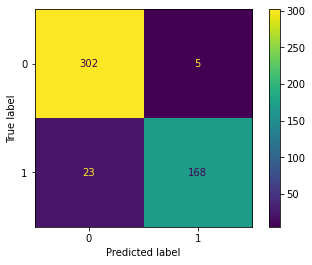

In [178]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [179]:
#X_train

4.) Run through steps increasing your min_samples_leaf and decreasing your max_depth.


In [158]:
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=123)

rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, random_state=123)

In [159]:
# Feature Importance- Evaluate importance, or weight, of each feature. 
print(rf2.feature_importances_)

# Make Predictions - classify each flower by its estimated species. 
y_pred = rf2.predict(X_train)

# Estimate Probability - Estimate the probability of each species, using the training data. 
y_pred_probability = rf2.predict_proba(X_train)

[0.12240766 0.06134007 0.03291753 0.28378964 0.02812431 0.01329737
 0.02861435 0.42950907]


In [160]:
# Compute the Accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf2.score(X_train, y_train)))

# Create a Confusion Matrix 
cm = confusion_matrix(y_train, y_pred)
print(f'\n Confusion Matrix: \n {confusion_matrix(y_train, y_pred)} \n')

print(f' Classification Report: \n {classification_report(y_train, y_pred)})')

Accuracy of random forest classifier on training set: 0.88

 Confusion Matrix: 
 [[295  12]
 [ 48 143]] 

 Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       307
           1       0.92      0.75      0.83       191

    accuracy                           0.88       498
   macro avg       0.89      0.85      0.87       498
weighted avg       0.88      0.88      0.88       498
)


In [50]:
accuracy = rf2.score(X_train, y_train)
precision = sklearn.metrics.precision_score(y_train, y_pred, pos_label=1)
recall = sklearn.metrics.recall_score(y_train, y_pred, pos_label=1)
f1_score = sklearn.metrics.f1_score(y_train, y_pred, pos_label=1)
support_1 = int(y_train[y_train == 1].count())
support_0 = int(y_train[y_train == 0].count())

train_results = pd.DataFrame()
train_results['actual'] = y_train
train_results['predicted'] = y_pred

n=len(train)
tp_rate = len(train_results[(train_results.predicted == 1) & (train_results.actual == 1)]) / (train_results.actual == 1).sum()
fp_rate = len(train_results[(train_results.predicted == 1) & (train_results.actual != 1)]) / (train_results.actual == 0).sum()
tn_rate = len(train_results[(train_results.predicted != 1) & (train_results.actual != 1)]) / (train_results.actual == 0).sum()
fn_rate = len(train_results[(train_results.predicted != 1) & (train_results.actual == 1)]) / (train_results.actual == 1).sum()

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score:.2f}')
print(f'Support 1: {support_1}')
print(f'Support 0: {support_0}')
print()
print(f'True Postive Rate:\t{tp_rate:.2f}')
print(f'False Positive Rate:\t{fp_rate:.2f}')
print(f'True Negative Rate:\t{tn_rate:.2f}')
print(f'False Negative Rate:\t{fn_rate:.2f}')

Accuracy: 0.83
Precision: 0.71
Recall: 0.58
F1 Score: 0.64
Support 1: 1046
Support 0: 2897

True Postive Rate:	0.58
False Positive Rate:	0.08
True Negative Rate:	0.92
False Negative Rate:	0.42


5.) What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [51]:
# Surprisingly, the accuracy decreased when increasing the leaves and decreasing the max depth

# K-NEAREST NEIGHBOR.

1.) Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [180]:
#uniform and k=5 are default. No need to fill parameters. 
knn = KNeighborsClassifier()

#Fit the model to the training data.
knn.fit(X_train, y_train)

# Make Predictions: Classify each flower by its estimated species. 
y_pred = knn.predict(X_train)

#Estimate probabilty
y_pred_proba = knn.predict_proba(X_train)


2.) Evaluate your results using the model score, confusion matrix, and classification report.

In [181]:
# Compute the Accuracy 
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

# Create a classification report 
print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.81
[[265  42]
 [ 54 137]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       307
           1       0.77      0.72      0.74       191

    accuracy                           0.81       498
   macro avg       0.80      0.79      0.79       498
weighted avg       0.81      0.81      0.81       498



3.) Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [182]:
#accuracy
acc = sklearn.metrics.accuracy_score(y_train, y_pred)
print(f' The accuracy is: {acc:.2%}')

#Confusion Matrix for TP FP TN FN
cm = confusion_matrix(y_train, y_pred)
print(f' Confusion Matrix: \n {cm} \n ')


tpr = cm[1][1] / cm[1].sum()
fpr = cm[0][1] / cm[0].sum()
tnr = cm[0][0] / cm[0].sum()
fnr = cm[1][0] / cm[1].sum()

tn, fp, fn, tp = cm.ravel()
print(f'Number of true negatives  (tn) = {tn} \n The True Negative Rate (tnr) is: {tnr:.3} \n')
print(f'Number of true positives  (tp) = {tp} \n The True Positive Rate (tpr) is:  {tpr:.3} \n')
print(f'Number of false negatives (fn) = {fn} \n The False Negative Rate (tpr) is: {fnr:.3} \n')
print(f'Number of false positives (fp) = {fp} \n The False Positive Rate (tpr) is: {fpr:.3} \n')

print(f"""
What the confusion matrix tells us now, in more detail, is that we got {tn}
of the people who did not survive right, and {tp} of the people who did survive right.
But also that we killed {fn} of the passengers in our model,
and brought {fp} of them back to life through Necromancy!""")
#precision
pre = sklearn.metrics.precision_score(y_train,y_pred)
print(f' The precision is: {pre:.2%}')

#recall
rec = sklearn.metrics.recall_score(y_train,y_pred)
print(f' The recall rate is: {rec:.2%}')

#f1-score
f1 = sklearn.metrics.f1_score(y_train,y_pred)
print(f' The F1 score is: {f1:.2%}')



 The accuracy is: 80.72%
 Confusion Matrix: 
 [[265  42]
 [ 54 137]] 
 
Number of true negatives  (tn) = 265 
 The True Negative Rate (tnr) is: 0.863 

Number of true positives  (tp) = 137 
 The True Positive Rate (tpr) is:  0.717 

Number of false negatives (fn) = 54 
 The False Negative Rate (tpr) is: 0.283 

Number of false positives (fp) = 42 
 The False Positive Rate (tpr) is: 0.137 


What the confusion matrix tells us now, in more detail, is that we got 265
of the people who did not survive right, and 137 of the people who did survive right.
But also that we killed 54 of the passengers in our model,
and brought 42 of them back to life through Necromancy!
 The precision is: 76.54%
 The recall rate is: 71.73%
 The F1 score is: 74.05%


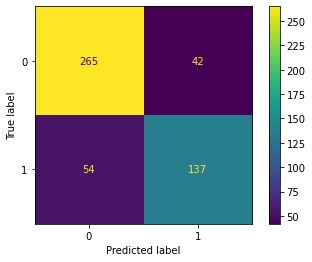

In [183]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

4.) Run through steps 2-4 setting k to 10

In [185]:
#uniform and k=5 are default. No need to fill parameters. 
knn10 = KNeighborsClassifier(10)

#Fit the model to the training data.
knn10.fit(X_train, y_train)

# Make Predictions: Classify each flower by its estimated species. 
y_pred = knn10.predict(X_train)

#Estimate probabilty
y_pred_proba = knn10.predict_proba(X_train)

#######

# Compute the Accuracy 
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))

# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

# Create a classification report 
print(classification_report(y_train, y_pred))

######

#accuracy
acc = sklearn.metrics.accuracy_score(y_train, y_pred)
print(f' The accuracy is: {acc:.2%}')

#Confusion Matrix for TP FP TN FN
cm = confusion_matrix(y_train, y_pred)
print(f' Confusion Matrix: \n {cm} \n ')


tpr = cm[1][1] / cm[1].sum()
fpr = cm[0][1] / cm[0].sum()
tnr = cm[0][0] / cm[0].sum()
fnr = cm[1][0] / cm[1].sum()

tn, fp, fn, tp = cm.ravel()
print(f'Number of true negatives  (tn) = {tn} \n The True Negative Rate (tnr) is: {tnr:.3} \n')
print(f'Number of true positives  (tp) = {tp} \n The True Positive Rate (tpr) is:  {tpr:.3} \n')
print(f'Number of false negatives (fn) = {fn} \n The False Negative Rate (tpr) is: {fnr:.3} \n')
print(f'Number of false positives (fp) = {fp} \n The False Positive Rate (tpr) is: {fpr:.3} \n')

print(f"""
What the confusion matrix tells us now, in more detail, is that we got {tn}
of the people who did not survive right, and {tp} of the people who did survive right.
But also that we killed {fn} of the passengers in our model,
and brought {fp} of them back to life through Necromancy!""")
#precision
pre = sklearn.metrics.precision_score(y_train,y_pred)
print(f' The precision is: {pre:.2%}')

#recall
rec = sklearn.metrics.recall_score(y_train,y_pred)
print(f' The recall rate is: {rec:.2%}')

#f1-score
f1 = sklearn.metrics.f1_score(y_train,y_pred)
print(f' The F1 score is: {f1:.2%}')



Accuracy of KNN classifier on training set: 0.78
[[267  40]
 [ 68 123]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       307
           1       0.75      0.64      0.69       191

    accuracy                           0.78       498
   macro avg       0.78      0.76      0.76       498
weighted avg       0.78      0.78      0.78       498

 The accuracy is: 78.31%
 Confusion Matrix: 
 [[267  40]
 [ 68 123]] 
 
Number of true negatives  (tn) = 267 
 The True Negative Rate (tnr) is: 0.87 

Number of true positives  (tp) = 123 
 The True Positive Rate (tpr) is:  0.644 

Number of false negatives (fn) = 68 
 The False Negative Rate (tpr) is: 0.356 

Number of false positives (fp) = 40 
 The False Positive Rate (tpr) is: 0.13 


What the confusion matrix tells us now, in more detail, is that we got 267
of the people who did not survive right, and 123 of the people who did survive right.
But also that we killed 68 of the passengers in 

5.) Run through steps 2-4 setting k to 20

In [187]:
#uniform and k=5 are default. No need to fill parameters. 
knn20 = KNeighborsClassifier(20)

#Fit the model to the training data.
knn20.fit(X_train, y_train)

# Make Predictions: Classify each flower by its estimated species. 
y_pred = knn20.predict(X_train)

#Estimate probabilty
y_pred_proba = knn20.predict_proba(X_train)

#######

# Compute the Accuracy 
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn20.score(X_train, y_train)))

# Create a confusion matrix
print(confusion_matrix(y_train, y_pred))

# Create a classification report 
print(classification_report(y_train, y_pred))

######

#accuracy
acc = sklearn.metrics.accuracy_score(y_train, y_pred)
print(f' The accuracy is: {acc:.2%}')

#Confusion Matrix for TP FP TN FN
cm = confusion_matrix(y_train, y_pred)
print(f' Confusion Matrix: \n {cm} \n ')


tpr = cm[1][1] / cm[1].sum()
fpr = cm[0][1] / cm[0].sum()
tnr = cm[0][0] / cm[0].sum()
fnr = cm[1][0] / cm[1].sum()

tn, fp, fn, tp = cm.ravel()
print(f'Number of true negatives  (tn) = {tn} \n The True Negative Rate (tnr) is: {tnr:.3} \n')
print(f'Number of true positives  (tp) = {tp} \n The True Positive Rate (tpr) is:  {tpr:.3} \n')
print(f'Number of false negatives (fn) = {fn} \n The False Negative Rate (tpr) is: {fnr:.3} \n')
print(f'Number of false positives (fp) = {fp} \n The False Positive Rate (tpr) is: {fpr:.3} \n')

print(f"""
What the confusion matrix tells us now, in more detail, is that we got {tn}
of the people who did not survive right, and {tp} of the people who did survive right.
But also that we killed {fn} of the passengers in our model,
and brought {fp} of them back to life through Necromancy!""")
#precision
pre = sklearn.metrics.precision_score(y_train,y_pred)
print(f' The precision is: {pre:.2%}')

#recall
rec = sklearn.metrics.recall_score(y_train,y_pred)
print(f' The recall rate is: {rec:.2%}')

#f1-score
f1 = sklearn.metrics.f1_score(y_train,y_pred)
print(f' The F1 score is: {f1:.2%}')



Accuracy of KNN classifier on training set: 0.74
[[263  44]
 [ 87 104]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       307
           1       0.70      0.54      0.61       191

    accuracy                           0.74       498
   macro avg       0.73      0.70      0.71       498
weighted avg       0.73      0.74      0.73       498

 The accuracy is: 73.69%
 Confusion Matrix: 
 [[263  44]
 [ 87 104]] 
 
Number of true negatives  (tn) = 263 
 The True Negative Rate (tnr) is: 0.857 

Number of true positives  (tp) = 104 
 The True Positive Rate (tpr) is:  0.545 

Number of false negatives (fn) = 87 
 The False Negative Rate (tpr) is: 0.455 

Number of false positives (fp) = 44 
 The False Positive Rate (tpr) is: 0.143 


What the confusion matrix tells us now, in more detail, is that we got 263
of the people who did not survive right, and 104 of the people who did survive right.
But also that we killed 87 of the passengers i

6.) What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
# accuracy decreases as n increases. As does recall and precision. 

7.) Which model performs best on our out-of-sample data from validate?

In [ ]:
# It's close, but the first KNN model performs best

In [184]:
print('Accuracy of KNN classifier on training set n_neighbors set to 5: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on validate set with n_neighbors set to 5: {:.2f}\n'
     .format(knn.score(X_validate, y_validate)))


Accuracy of KNN classifier on training set n_neighbors set to 5: 0.81
Accuracy of KNN classifier on validate set with n_neighbors set to 5: 0.74



In [186]:
print('Accuracy of KNN classifier on training set n_neighbors set to 10: {:.2f}'
     .format(knn10.score(X_train, y_train)))
print('Accuracy of KNN classifier on validate set with n_neighbors set to 10: {:.2f}\n'
     .format(knn10.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set n_neighbors set to 10: 0.78
Accuracy of KNN classifier on validate set with n_neighbors set to 10: 0.71



In [188]:
print('Accuracy of KNN classifier on training set n_neighbors set to 20: {:.2f}'
     .format(knn20.score(X_train, y_train)))
print('Accuracy of KNN classifier on validate set with n_neighbors set to 20: {:.2f}'
     .format(knn20.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set n_neighbors set to 20: 0.74
Accuracy of KNN classifier on validate set with n_neighbors set to 20: 0.67


# LOGISTIC REGRESSION

"In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

For all of the models you create, choose a threshold that optimizes for accuracy.

Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work."

1.) Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

In [5]:
df = get_titanic_data()
df
df = prep_titanic_keep_age(df)
describe_data(df)

train, test = train_test_split(df, test_size = .2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

Using cached csv
The first three rows are: 
----------------------------------------------------------
   survived  pclass   age  sibsp  parch     fare  alone  Queenstown  \
0         0       3  22.0      1      0   7.2500      0           0   
1         1       1  38.0      1      0  71.2833      0           0   
2         1       3  26.0      0      0   7.9250      1           0   

   Southampton  male  
0            1     1  
1            0     0  
2            1     0  
----------------------------------------------------------
The data frame's shape is: 
-------------------------
(891, 10)
-------------------------
The data types and column names are: 
['Queenstown', 'Southampton', 'age', 'alone', 'fare', 'male', 'parch', 'pclass', 'sibsp', 'survived']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  


In [6]:
# Separating x and y 
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [17]:
print(f' The mode is {train.survived.mode()} and so it is our baseline just the same.')
baseline_accuracy = (train.survived == 0).mean()
print(f' The baseline accuracy is {baseline_accuracy:.2}')

 The mode is 0    0
dtype: int64 and so it is our baseline just the same.
 The baseline accuracy is 0.62


In [39]:
# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features = ["age", "pclass", "fare"]

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])
hmm = pd.DataFrame(y_pred)

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

# X contains independent values, Y contains dependent values. 
print("yes, this model performs better than the baseline")

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.70
yes, this model performs better than the baseline


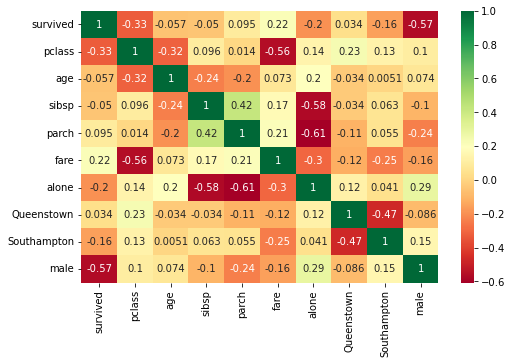

In [41]:
plt.subplots(figsize=(8, 5))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [35]:
#plt.figure(figsize=(15,8))
#ax = train.age.hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
#train.age.plot(kind='density', color='teal')
#ax.legend(['age'])
#ax.set(xlabel='age')
#plt.xlim(-10,85)
#plt.show()

2.) Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [ ]:
# Check. Accomplished in the prep function. 

3.) Try out other combinations of features and models.

4.) Use you best 3 models to predict and evaluate on your validate sample.

5.) Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

Bonus1 How do different strategies for handling the missing values in the age column affect model performance?

Bonus2: How do different strategies for encoding sex affect model performance?

Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty.
Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

Bonus Bonus: how does scaling the data interact with your choice of C?

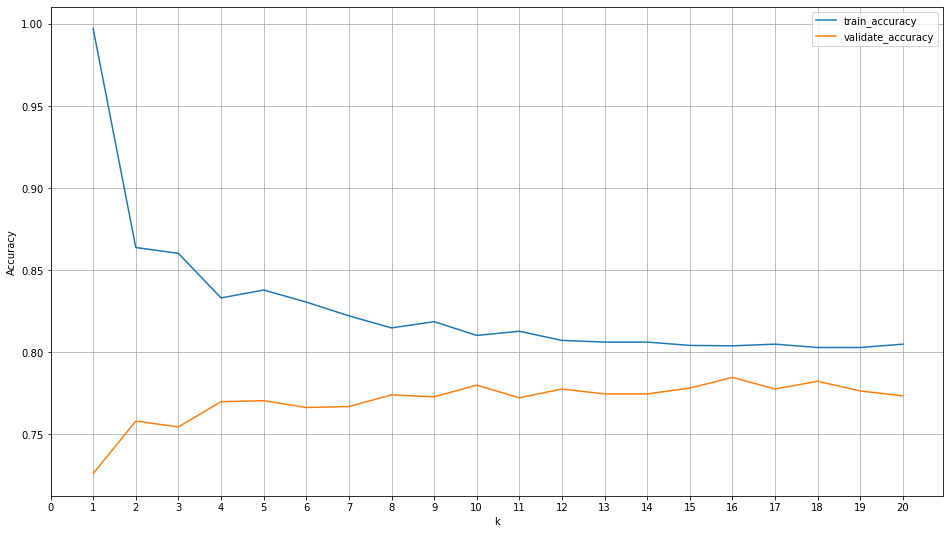

In [109]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [42]:
# I just like to include stuff at the end as inspiration. Authors and licenses mentioned, neither contain any of my work. 

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'logreg' is not defined

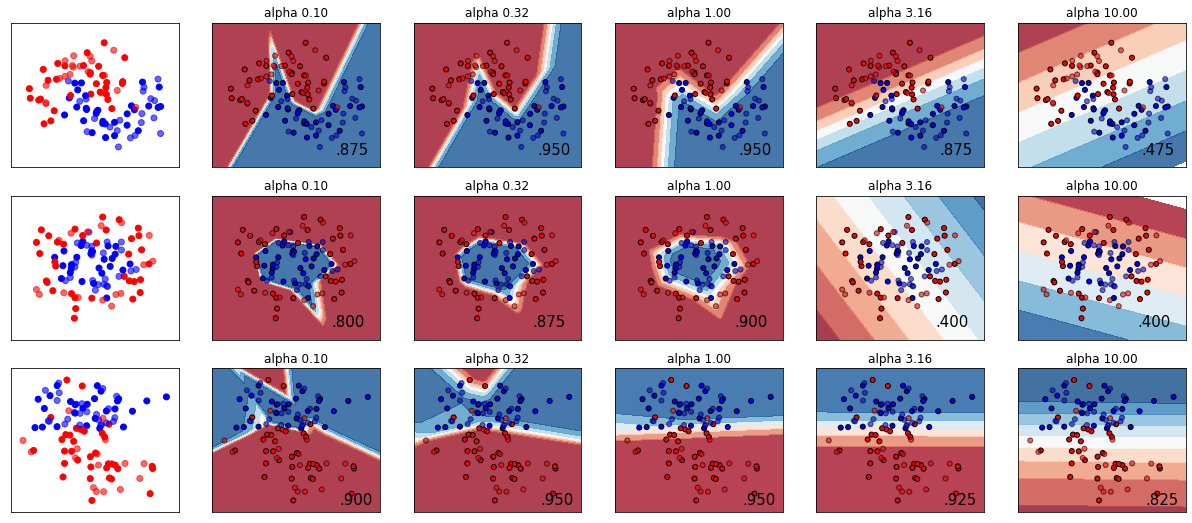

In [40]:
# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

h = 0.02  # step size in the mesh

alphas = np.logspace(-1, 1, 5)

classifiers = []
names = []
for alpha in alphas:
    classifiers.append(
        make_pipeline(
            StandardScaler(),
            MLPClassifier(
                solver="lbfgs",
                alpha=alpha,
                random_state=1,
                max_iter=2000,
                early_stopping=True,
                hidden_layer_sizes=[10, 10],
            ),
        )
    )
    names.append(f"alpha {alpha:.2f}")

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the training points
        ax.scatter(
            X_train[:, 0],
            X_train[:, 1],
            c=y_train,
            cmap=cm_bright,
            edgecolors="black",
            s=25,
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            alpha=0.6,
            edgecolors="black",
            s=25,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            f"{score:.3f}".lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

figure.subplots_adjust(left=0.02, right=0.98)
plt.show()


dataset 0
---------
LogisticRegression: 0.86
LinearSVC: 0.86
KBinsDiscretizer + LogisticRegression: 0.86
KBinsDiscretizer + LinearSVC: 0.92
GradientBoostingClassifier: 0.90
SVC: 0.94

dataset 1
---------
LogisticRegression: 0.40
LinearSVC: 0.40
KBinsDiscretizer + LogisticRegression: 0.88
KBinsDiscretizer + LinearSVC: 0.82
GradientBoostingClassifier: 0.84
SVC: 0.84

dataset 2
---------
LogisticRegression: 0.98
LinearSVC: 0.96
KBinsDiscretizer + LogisticRegression: 0.94
KBinsDiscretizer + LinearSVC: 0.94
GradientBoostingClassifier: 0.94
SVC: 0.98


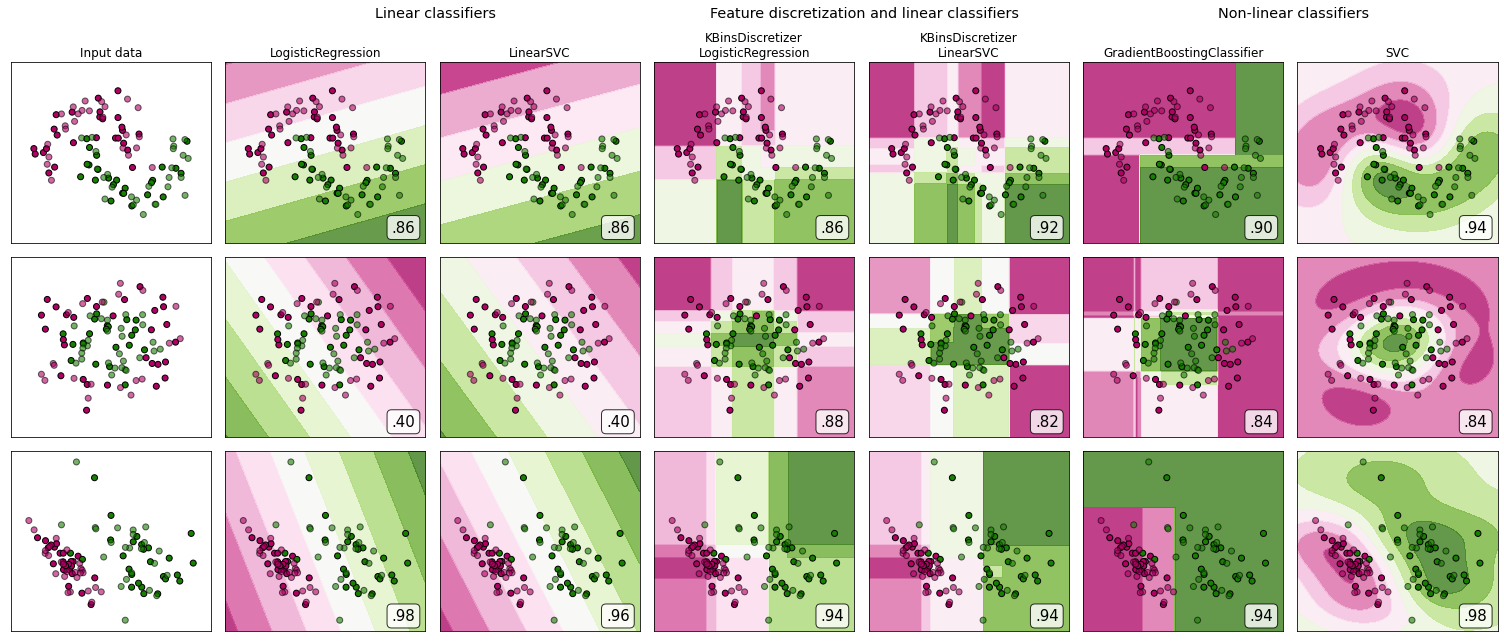

In [41]:
# Code source: Tom Dupré la Tour
# Adapted from plot_classifier_comparison by Gaël Varoquaux and Andreas Müller
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

h = 0.02  # step size in the mesh


def get_name(estimator):
    name = estimator.__class__.__name__
    if name == "Pipeline":
        name = [get_name(est[1]) for est in estimator.steps]
        name = " + ".join(name)
    return name


# list of (estimator, param_grid), where param_grid is used in GridSearchCV
# The parameter spaces in this example are limited to a narrow band to reduce
# its runtime. In a real use case, a broader search space for the algorithms
# should be used.
classifiers = [
    (
        make_pipeline(StandardScaler(), LogisticRegression(random_state=0)),
        {"logisticregression__C": np.logspace(-1, 1, 3)},
    ),
    (
        make_pipeline(StandardScaler(), LinearSVC(random_state=0)),
        {"linearsvc__C": np.logspace(-1, 1, 3)},
    ),
    (
        make_pipeline(
            StandardScaler(),
            KBinsDiscretizer(encode="onehot"),
            LogisticRegression(random_state=0),
        ),
        {
            "kbinsdiscretizer__n_bins": np.arange(5, 8),
            "logisticregression__C": np.logspace(-1, 1, 3),
        },
    ),
    (
        make_pipeline(
            StandardScaler(),
            KBinsDiscretizer(encode="onehot"),
            LinearSVC(random_state=0),
        ),
        {
            "kbinsdiscretizer__n_bins": np.arange(5, 8),
            "linearsvc__C": np.logspace(-1, 1, 3),
        },
    ),
    (
        make_pipeline(
            StandardScaler(), GradientBoostingClassifier(n_estimators=5, random_state=0)
        ),
        {"gradientboostingclassifier__learning_rate": np.logspace(-2, 0, 5)},
    ),
    (
        make_pipeline(StandardScaler(), SVC(random_state=0)),
        {"svc__C": np.logspace(-1, 1, 3)},
    ),
]

names = [get_name(e).replace("StandardScaler + ", "") for e, _ in classifiers]

n_samples = 100
datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_classification(
        n_samples=n_samples,
        n_features=2,
        n_redundant=0,
        n_informative=2,
        random_state=2,
        n_clusters_per_class=1,
    ),
]

fig, axes = plt.subplots(
    nrows=len(datasets), ncols=len(classifiers) + 1, figsize=(21, 9)
)

cm_piyg = plt.cm.PiYG
cm_bright = ListedColormap(["#b30065", "#178000"])

# iterate over datasets
for ds_cnt, (X, y) in enumerate(datasets):
    print(f"\ndataset {ds_cnt}\n---------")

    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=42
    )

    # create the grid for background colors
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # plot the dataset first
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # and testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    # iterate over classifiers
    for est_idx, (name, (estimator, param_grid)) in enumerate(zip(names, classifiers)):
        ax = axes[ds_cnt, est_idx + 1]

        clf = GridSearchCV(estimator=estimator, param_grid=param_grid)
        with ignore_warnings(category=ConvergenceWarning):
            clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print(f"{name}: {score:.2f}")

        # plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]*[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.column_stack([xx.ravel(), yy.ravel()]))
        else:
            Z = clf.predict_proba(np.column_stack([xx.ravel(), yy.ravel()]))[:, 1]

        # put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm_piyg, alpha=0.8)

        # plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # and testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())

        if ds_cnt == 0:
            ax.set_title(name.replace(" + ", "\n"))
        ax.text(
            0.95,
            0.06,
            (f"{score:.2f}").lstrip("0"),
            size=15,
            bbox=dict(boxstyle="round", alpha=0.8, facecolor="white"),
            transform=ax.transAxes,
            horizontalalignment="right",
        )


plt.tight_layout()

# Add suptitles above the figure
plt.subplots_adjust(top=0.90)
suptitles = [
    "Linear classifiers",
    "Feature discretization and linear classifiers",
    "Non-linear classifiers",
]
for i, suptitle in zip([1, 3, 5], suptitles):
    ax = axes[0, i]
    ax.text(
        1.05,
        1.25,
        suptitle,
        transform=ax.transAxes,
        horizontalalignment="center",
        size="x-large",
    )
plt.show()

In [83]:
#def plot_confusion_mat(null_mat, confused_mat, legend_loc=3, scores=None, filename=None):
#    """
#    Renders a confusion matrix and creates a bar graph representing the model's
#    previous and current F1 scores.
#    """
#    
#    new_style = {'grid': False}
#    plt.rc('axes', **new_style)
#
#    colors = ['#3182bd', '#fd8d3c', '#fdd0a2', '#c6dbef', '#9467bd', '#98df8a']
#    line_alpha = 0.25
#    plot_size = confused_mat.sum()
#    quad = plot_size / 2
#   
#    fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))
#
#    ##########
#    # AXIS 1 #
#    ##########
#    
#    axis1.tick_params(
#        axis='both',
#        top='off',right='off', bottom='off', left='off',
#        labeltop='off', labelright='off', labelbottom='off', labelleft='off')
#    axis1.spines['top'].set_linewidth(0)
#    axis1.spines['right'].set_linewidth(0)
#    axis1.spines['bottom'].set_linewidth(0)
#    axis1.spines['left'].set_linewidth(0)
#
#    axis1.set_xlim(0,plot_size)
#    axis1.set_ylim(0,plot_size)
#
#    # plot cross marks
#    axis1.plot([quad, quad], [0, plot_size], color='0', alpha=line_alpha)
#    axis1.plot([0, plot_size], [quad, quad], color='0', alpha=line_alpha)
#    
#    # draw confusion matrix
#    
#    total_tn = null_mat[0][0]
#    total_fn = null_mat[1][0]
#    
#    tn = confused_mat[0][0]
#    a = (tn/total_tn) * quad # percentage of total true negatives * quad
#    axis1.bar([quad-a], [a], width=a, bottom=quad, lw=0, color=colors[0], label='True negative')
#    
#    fp = confused_mat[0][1]
#    a = (fp/total_fn) * quad # percentage of total false negatives * quad
#    axis1.bar([quad], [a], width=a, bottom=quad, lw=0, color=colors[1], label='False positive')
#    
#    fn = confused_mat[1][0]
#    a = (fn/total_fn) * quad # percentage of total false negatives * quad
#    axis1.bar([quad-a], [a], width=a, bottom=quad-a, lw=0, color=colors[2], label='False negative')
#    
#    tp = confused_mat[1][1]
#    a = (tp/total_fn) * quad # percentage of total true negatives * quad
#    axis1.bar([quad], [a], width=a, bottom=quad-a, lw=0, color=colors[3], label='True positive')
#
#    # legend
#    leg = axis1.legend(loc=legend_loc, framealpha=line_alpha, borderpad=1, labelspacing=1, handlelength=1, fontsize=11)
#    
#    # set the linewidth of each legend object
#    for legobj in leg.legendHandles:
#        legobj.set_linewidth(0)
#    
#    ##########
#    # AXIS 2 #
#    ##########
#    
#    lw = 0.75 if scores != None else 0.0
#    ticks = 'on' if scores != None else 'off'
#    axis2.tick_params(
#        axis='both',
#        top='off',right='off', bottom=ticks, left=ticks,
#        labeltop='off', labelright='off', labelbottom=ticks, labelleft=ticks)
#    axis2.spines['top'].set_linewidth(0)
#    axis2.spines['right'].set_linewidth(0)
#    axis2.spines['bottom'].set_linewidth(lw)
#    axis2.spines['left'].set_linewidth(lw)
#    
#    if scores:
#    
#        bar_width=10
#        bar_padding=5
#        axis2.set_xlim(0, 40)
#        axis2.set_ylim(0, 1)
#
#        x = [1.5*bar_width, 2.5*bar_width]
#    
#        if len(scores) > 1:
#            axis2.bar(bar_width, scores[-2]['f1'], width=bar_width, lw=0, color=colors[4], alpha=0.3)
#        axis2.bar(2*bar_width, scores[-1]['f1'], width=bar_width, lw=0, color=colors[4])
#
#        axis2.set_xticks(x)
#        axis2.set_xticklabels(['previous', 'current'])
#        axis2.set_ylabel('F1 score')
#    
#    plt.tight_layout(w_pad=6.0)
#    if (filename):
#        plt.savefig('plots/' + filename)
#        
#